In [ ]:
#Modulated resonator caluculator
#Jonathan Hoh 11/16/2019

In [122]:
import skrf as rf
from skrf import plotting as nplt
from matplotlib import pyplot as plt
import numpy as np

In [123]:
#upload s2p files and get the s21 and phase data
ntwk = rf.Network('155new.s2p')
s21 = ntwk.s[:,1,0]
mag = []
for i in range(len(s21)):
    mag.append(20*np.log10(np.abs(s21[i])))
freq = []
for i in range(len(ntwk.frequency.f)):
    freq.append(ntwk.frequency.f[i])
ang_raw = []
for i in range(len(s21)):
    ang_raw.append(np.angle(s21[i]))
ang = list(np.unwrap(ang_raw)*180/np.pi)

In [124]:
#now do the same for the modulated resonator
m_ntwk = rf.Network('155mod.s2p')
m_s21 = m_ntwk.s[:,1,0]
m_mag = []
for i in range(len(m_s21)):
    m_mag.append(20*np.log10(np.abs(m_s21[i])))
m_freq = []
for i in range(len(m_ntwk.frequency.f)):
    m_freq.append(m_ntwk.frequency.f[i])
m_ang_raw = []
for i in range(len(m_s21)):
    m_ang_raw.append(np.angle(m_s21[i]))
m_ang = list(np.unwrap(m_ang_raw)*180/np.pi)

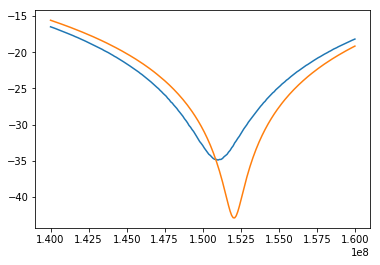

In [125]:
#plot and compare s21
plt.plot(freq,m_mag)
plt.plot(freq,mag)

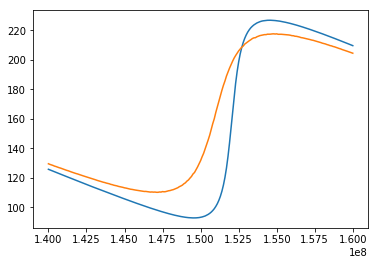

In [126]:
#plot and compare phases
plt.plot(freq,ang)
plt.plot(freq,m_ang)

In [145]:
#find minimum value of s21 (resonance)
  
low = min(mag)
loc = mag.index(min(mag))
res = freq[loc]
    
m_low = min(m_mag)
m_loc = m_mag.index(min(m_mag))
m_res = m_freq[m_loc]

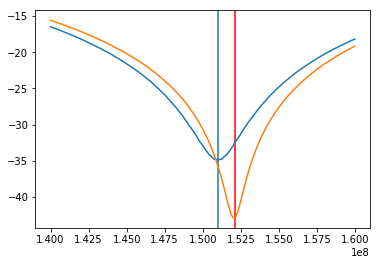

In [154]:
#plot resonance lines on s21 to be sure the math works
plt.axvline(x=res, color = 'r')
plt.axvline(x=m_res)
plt.plot(freq,m_mag)
plt.plot(freq,mag)

In [129]:
#find phi0 of phase at resonance
phi0 = ang[mag.index(min(mag))];
m_phi0 = m_ang[m_mag.index(min(m_mag))];
error = np.abs(phi0-m_phi0);

In [130]:
phi0

164.27999124862734

In [131]:
m_phi0

164.27337100597313

In [132]:
error

0.006620242654207686

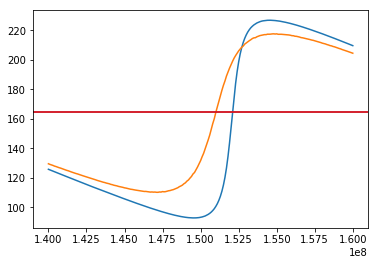

In [152]:
#replot the phase plots with phi0 drawn
plt.plot(freq,ang)
plt.plot(freq,m_ang)
plt.axhline(y=phi0)
plt.axhline(y=m_phi0, color = 'r')

In [133]:
#Now create a function that will try to find linear portion
#seems to occur around halfway (really 3/4) between max/min and resonance
#this (3/4) value may have to be tweaked depending on quality factor
#significantly higher quality factors may need lower values and vice-vera
def slope(ang, freq):
    ang_M = max(ang);
    ang_m = min(ang);
    loc_M = ang.index(ang_M)
    loc_m = ang.index(ang_m)
    half_min = round(loc_m+(loc-loc_m)*(3/4));
    half_max = round(loc_M-(loc_M-loc)*(3/4));
    lp_start = ang[half_min];
    lp_stop = ang[half_max];
    lf_start = freq[half_min];
    lf_stop = freq[half_max];
    slope = (lp_stop-lp_start)/(lf_stop-lf_start);
    return slope
slope_guess = slope(ang, freq)
m_slope_guess = slope(m_ang, m_freq)


In [138]:
slope_guess

7.48841861051822e-05

In [139]:
m_slope_guess

2.5909507711253504e-05